# XML


Los servicios web realmente agregan una capa de formalismo sobre esto donde estamos simplemente siendo un poco más formales sobre cómo hacemos esto.

Bueno, básicamente, en algún momento, cambiaremos de mover datos de ida y vuelta a estas APIs o Interfaces de Programas de Aplicaciones.

Así que, como hemos dicho antes, este Ciclo de Solicitud/Respuesta que originalmente era para documentos e imágenes, se ha estado utilizando para los datos.

Hemos estado pensando en formas de trasladar los datos de una forma que realmente no requiera que los humanos los vean, pero que en su lugar tengan programas que producen y consumen estos datos.
  
La idea básica es esta, tienes datos en un programa y así, tenemos dos programas aquí y se van a comunicar a través de Internet. Entonces, podríamos tener un programa Python que está produciendo los datos, tal vez esté leyendo una base de datos, tal vez esté leyendo un archivo, quién sabe.
   
Pero en el interior, tiene una estructura de datos Python como un diccionario, y queremos enviar eso a través de la red. Entonces, la red no es Python, la red no es Java. La red es un dato. Quiero decir, son los datos que se van a transmitir, y así hemos trabajado a lo largo de los años lo que llamamos el Protocolo del Cable o cómo los datos se ponen en el cable o cómo salen de un sistema, se transfieren en una red y luego entran en otro sistema.

En ese sistema de destino, no siempre es Python, podría ser otro programa. Tal vez nuestro diccionario de Python en este otro sistema, necesita ser un Java HashMap. No podemos decir que vamos a enviar datos de Python a través de la red y no podemos decir que vamos a enviar datos Java a través de la red, sólo tenemos que enviar una red en algún formato en el que estemos de acuerdo.

Por lo tanto, nos gusta tener que discutir sobre cuál es el formato. Digamos, "OK, vamos a hacer esto y esto es XML, que es uno de los formatos del cable". Es como, ". Bien, vamos a tomar estos datos que están en un diccionario de Python." XML se parece a HTML y usa etiquetas de "menor que" y "mayor que". Vamos a enviar a una persona a través de la red. Esta persona va a tener un nombre y un número de teléfono, que son los datos que vamos a enviar. Vamos a decir que ese es nuestro formato de cable.

No es como Python piensa en ello. No es como Java piensa en ello. Es un protocolo intermedio acordado que es sólo texto, ¿verdad? No es memoria interna. El acto de pasar de una representación interna en un computadora a un tipo de formato de intercambio se llama serialización, y eso tiene que ver con el hecho de que en los viejos tiempos, teníamos estos cables y enviamos los datos en serie un carácter a la vez. Lo tomaba de la memoria interna de la computadora, un formato en que podemos enviar un carácter a la vez, carácter, carácter. Esto se conoce como un formato de serialización. Así que, entonces el acto de extraer los datos de el cable y convertirlos en una estructura interna de datos nueva, en el nuevo ambiente, potencialmente en un lenguaje nuevo, se llama deserialización.

Entonces, tomamos nuestra estructura interna, la serializamos, la enviamos a través de la red, luego la recibimos, la deserializamos y la usamos en este otro lenguaje de programación en cualquier estructura que tenga sentido en ese lenguaje de programación en particular. Los dos tipos principales de formatos de serialización de los que vamos a hablar son XML y JSON. Esos son los dos y XML es el mayor de los dos y JSON es el más moderno de los dos. XML es el más complejo y algunos dirían más riguroso de los dos, y JSON es la versión más ligera del otro.

Entonces, tomas tu diccionario de Python, produces JSON, envías JSON a través de la red como una cadena o un documento, y luego recibes el documento y luego lo conviertes en lo que sea que vaya a estar en ese extremo.

Así que, esa es la idea básica de acordar los formatos de datos.

# Clase 1: Introducción a XML


## Objetivos:



* Comprender los conceptos de datos estructurados, semi-estructurados y no estructurados.
* Introducir el modelo de datos de XML, sus características y propiedades.
* Crear y manipular documentos XML básicos en Python.



## Teoría



### Datos estructurados, semi-estructurados y no estructurados

* Datos estructurados: Datos organizados en un formato fijo, como tablas en una base de datos relacional (ejemplo: SQL).
* Datos semi-estructurados: Datos que no tienen un esquema fijo, pero contienen etiquetas o marcadores para separar elementos (ejemplo: XML, JSON).
* Datos no estructurados: Datos sin un formato específico, como texto libre, imágenes o videos.

## Modelo de datos de XML

XML (eXtensible Markup Language): Lenguaje de marcado utilizado para almacenar y transportar datos.

### Características:

Es legible tanto por humanos como por máquinas.
Es extensible, lo que permite definir etiquetas personalizadas.
Es independiente de la plataforma.

### Propiedades:

Los datos se organizan en forma de árbol.

Utiliza etiquetas de apertura y cierre ```(<tag></tag>).```

Puede incluir atributos en las etiquetas ```(<tag atributo="valor">)```.




In [ ]:
import xml.etree.ElementTree as ET

# Crear el elemento raíz
root = ET.Element("catalogo")

# Crear subelementos
libro1 = ET.SubElement(root, "libro")
libro1.set("id", "1")
titulo1 = ET.SubElement(libro1, "titulo")
titulo1.text = "Aprendiendo Python"
autor1 = ET.SubElement(libro1, "autor")
autor1.text = "John Doe"

libro2 = ET.SubElement(root, "libro")
libro2.set("id", "2")
titulo2 = ET.SubElement(libro2, "titulo")
titulo2.text = "Ciencia de Datos con Python"
autor2 = ET.SubElement(libro2, "autor")
autor2.text = "Jane Smith"

# Convertir a un árbol XML y guardar en un archivo
tree = ET.ElementTree(root)
tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)

print("Archivo XML creado exitosamente.")

Archivo XML creado exitosamente.


Para poder leer un documento XML, utilizamos un ciclo for para recorrer todos los objetos de los nodos.

In [ ]:
# Leer el archivo XML
tree = ET.parse("catalogo.xml")
root = tree.getroot()

# Recorrer el árbol XML
for libro in root.findall("libro"):
    id = libro.get("id")
    titulo = libro.find("titulo").text
    autor = libro.find("autor").text
    print(f"ID: {id}, Título: {titulo}, Autor: {autor}")

ID: 1, Título: Aprendiendo Python, Autor: John Doe
ID: 2, Título: Ciencia de Datos con Python, Autor: Jane Smith


Agregamos nuevos elementos al archivo XML

In [ ]:
# Crear un nuevo libro y agregarlo al catálogo
nuevo_libro = ET.SubElement(root, "libro")
nuevo_libro.set("id", "3")  # Asigna un nuevo ID

titulo = ET.SubElement(nuevo_libro, "titulo")
titulo.text = "Machine Learning Básico"

autor = ET.SubElement(nuevo_libro, "autor")
autor.text = "Carlos Pérez"

# 3. Guardar los cambios en el archivo XML
tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)

print("Nuevo libro agregado exitosamente.")

Nuevo libro agregado exitosamente.


### Id duplicados


Para evitar IDs duplicados, podemos hacer lo siguiente:

* Leer los IDs existentes y verificar si el nuevo ID ya está en uso.
* Si está repetido, generar automáticamente un ID único.
* Guardar los cambios en el archivo XML.

In [ ]:
# como aseguramos que el id no se repite

# Obtener el último ID registrado y sumarle 1
ultimo_id = max(int(libro.get("id")) for libro in root.findall("libro"))

new_id = ultimo_id + 1
new_id
# En caso de agergar un nuevo libro usar el id
#nuevo_libro.set("id", str(ultimo_id + 1))


4

In [ ]:
# Obtener todos los IDs actuales
ids_existentes = {int(libro.get("id")) for libro in root.findall("libro")}

ids_existentes

{1, 2, 3}

In [ ]:
type(ids_existentes)

set

In [ ]:
a = list(ids_existentes)
a

[1, 2, 3]

In [ ]:
# Generar un nuevo ID único (el siguiente número disponible)
nuevo_id = max(ids_existentes) + 1 if ids_existentes else 1  # Si está vacío, empieza en 1

# Crear un nuevo libro con un ID único
nuevo_libro = ET.SubElement(root, "libro")
nuevo_libro.set("id", str(nuevo_id))  # Asigna el nuevo ID

# 5. Agregar título y autor
titulo = ET.SubElement(nuevo_libro, "titulo")
titulo.text = "Deep Learning Avanzado"

autor = ET.SubElement(nuevo_libro, "autor")
autor.text = "Luis Gómez"

# 6. Guardar los cambios en el archivo XML
tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)

print(f"Nuevo libro agregado con ID: {nuevo_id}")

Nuevo libro agregado con ID: 4


In [ ]:
# Identificar IDs duplicados
id_count = {}  # Diccionario para contar los IDs
duplicados = []  # Lista para guardar libros con ID duplicado

for libro in root.findall("libro"):
    libro_id = libro.get("id") # obtengo el id de cada uno de los libros
    if libro_id in id_count: ### True
        id_count[libro_id] += 1
        duplicados.append(libro)  # Guardar el libro duplicado
    else:
        id_count[libro_id] = 1

# Asignar nuevos IDs a los duplicados
if duplicados: # true o false
    print("Corrigiendo IDs duplicados...")
    ids_existentes = {int(libro.get("id")) for libro in root.findall("libro")}
    nuevo_id = max(ids_existentes) + 1  # Empezamos desde el último ID usado

    for libro in duplicados:
        while str(nuevo_id) in id_count:  # Asegurar que el nuevo ID sea único
            nuevo_id += 1
        libro.set("id", str(nuevo_id))  # Asignar nuevo ID
        id_count[str(nuevo_id)] = 1  # Agregar el nuevo ID al dict
        print(f"Libro con título '{libro.find('titulo').text}' corregido con nuevo ID: {nuevo_id}")

    # 4. Guardar el archivo XML corregido
    tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)
    print("Archivo XML corregido y guardado.")
else:
    print("No se encontraron IDs duplicados.")

No se encontraron IDs duplicados.


Vamos a agregar un libro mas con un id duplicado para verificar si ahora nuestro código funciona.

In [ ]:
# Crear un nuevo libro y agregarlo al catálogo
new_book = ET.SubElement(root, "libro")
new_book.set("id", "4")  # Asigna un nuevo ID

titulo = ET.SubElement(new_book, "titulo")
titulo.text = "La nueva mente del emperador"

autor = ET.SubElement(new_book, "autor")
autor.text = "Roger Penrose"

# 3. Guardar los cambios en el archivo XML
tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)

print("Nuevo libro agregado exitosamente.")

Nuevo libro agregado exitosamente.


In [ ]:
# Identificar IDs duplicados
id_count = {}  # Diccionario para contar los IDs
duplicados = []  # Lista para guardar libros con ID duplicado

for libro in root.findall("libro"):
    libro_id = libro.get("id")
    if libro_id in id_count:
        id_count[libro_id] += 1
        duplicados.append(libro)  # Guardar el libro duplicado
    else:
        id_count[libro_id] = 1

# Asignar nuevos IDs a los duplicados
if duplicados:
    print("Corrigiendo IDs duplicados...")
    ids_existentes = {int(libro.get("id")) for libro in root.findall("libro")}
    nuevo_id = max(ids_existentes) + 1  # Empezamos desde el último ID usado

    for libro in duplicados:
        while str(nuevo_id) in id_count:  # Asegurar que el nuevo ID sea único
            nuevo_id += 1
        libro.set("id", str(nuevo_id))  # Asignar nuevo ID
        id_count[str(nuevo_id)] = 1  # Agregar el nuevo ID a la lista
        print(f"Libro con título '{libro.find('titulo').text}' corregido con nuevo ID: {nuevo_id}")

    # 4. Guardar el archivo XML corregido
    tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)
    print("Archivo XML corregido y guardado.")
else:
    print("No se encontraron IDs duplicados.")

Corrigiendo IDs duplicados...
Libro con título 'La nueva mente del emperador' corregido con nuevo ID: 5
Archivo XML corregido y guardado.


In [ ]:
# @title Función para leer los archivos!
# code here!
import xml.etree.ElementTree as ET

def mostrar_libros_xml(ruta_archivo):
    """
    Lee un archivo XML y muestra la información de los libros.

    Parámetros:
        ruta_archivo (str): Ruta del archivo XML.
    """
    try:
        # Cargar el archivo XML
        tree = ET.parse(ruta_archivo)
        root = tree.getroot()

        # Recorrer el árbol XML
        for libro in root.findall("libro"):
            id = libro.get("id")  # Obtener el atributo "id"
            titulo = libro.find("titulo").text  # Obtener el texto del elemento <titulo>
            autor = libro.find("autor").text  # Obtener el texto del elemento <autor>
            print(f"ID: {id}, Título: {titulo}, Autor: {autor}")

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except ET.ParseError:
        print(f"Error: El archivo '{ruta_archivo}' no es un XML válido.")
    except Exception as e:
        print(f"Error inesperado: {e}")

In [ ]:
# @title Se muestra el contenido para el archivo catalogo xml
mostrar_libros_xml("catalogo.xml") # /content/catalogo.xml

ID: 1, Título: Aprendiendo Python, Autor: John Doe
ID: 2, Título: Ciencia de Datos con Python, Autor: Jane Smith
ID: 3, Título: Machine Learning Básico, Autor: Carlos Pérez
ID: 4, Título: Deep Learning Avanzado, Autor: Luis Gómez
ID: 5, Título: La nueva mente del emperador, Autor: Roger Penrose


## Agregar nuevos elemetos usando funciones

In [ ]:
import xml.etree.ElementTree as ET

def agregar_ventas(id_libro, año, cantidad):
    # 1. Cargar el archivo XML
    tree = ET.parse("catalogo.xml")
    root = tree.getroot()

    # 2. Buscar el libro por ID
    libro = root.find(f"./libro[@id='{id_libro}']")

    if libro is None:
        print(f"Libro con ID {id_libro} no encontrado.")
        return

    # 3. Verificar si ya existe el elemento <ventas>
    ventas = libro.find("ventas")
    if ventas is None:
        ventas = ET.SubElement(libro, "ventas")  # Crear si no existe

    # 4. Verificar si ya existe una entrada para ese año
    edicion = ventas.find(f"./edicion[@año='{año}']") # es vacio
    if edicion is None:
        edicion = ET.SubElement(ventas, "edicion") # crearlo
        edicion.set("año", str(año))
        edicion.text = str(cantidad)
    else:
        # Si ya existe, actualizamos la cantidad vendida
        edicion.text = str(int(edicion.text) + cantidad)

    # 5. Guardar los cambios en el archivo XML
    tree.write("catalogo.xml", encoding="utf-8", xml_declaration=True)
    print(f"Ventas actualizadas: {cantidad} copias en {año} para el libro con ID {id_libro}.")

# Ejemplo: Agregar ventas al libro con ID 1
agregar_ventas(id_libro="1", año=2024, cantidad=500)


Ventas actualizadas: 500 copias en 2024 para el libro con ID 1.


## Exportar las ventas en un archivo CSV


In [ ]:
import xml.etree.ElementTree as ET
import csv

def exportar_ventas_csv(nombre_archivo="ventas.csv"):
    # 1. Cargar el XML
    tree = ET.parse("catalogo.xml")
    root = tree.getroot()

    # 2. Abrir archivo CSV en modo escritura
    with open(nombre_archivo, mode="w", newline="", encoding="utf-8") as archivo_csv:
        writer = csv.writer(archivo_csv)

        # 3. Escribir la cabecera
        writer.writerow(["ID", "Título", "Autor", "Año", "Cantidad Vendida"])

        # 4. Recorrer libros y extraer información
        for libro in root.findall("libro"):
            id_libro = libro.get("id")
            titulo = libro.find("titulo").text
            autor = libro.find("autor").text

            # 5. Revisar si hay ventas
            ventas = libro.find("ventas")
            if ventas is not None:
                for edicion in ventas.findall("edicion"):
                    año = edicion.get("año")
                    cantidad = edicion.text
                    writer.writerow([id_libro, titulo, autor, año, cantidad])  # Escribir fila en CSV
            else:
                writer.writerow([id_libro, titulo, autor, "No disponible", "0"])  # Sin ventas

    print(f"Ventas exportadas exitosamente en {nombre_archivo}")

# Ejecutar la función
exportar_ventas_csv()


Ventas exportadas exitosamente en ventas.csv


## Crear un archivo xml a un df un objeto de pandas

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET

# Cargar XML
tree = ET.parse("catalogo.xml")
root = tree.getroot()

# Extraer datos
data = []
for libro in root.findall("libro"):
        data.append({
            "ID": libro.get("id"),
            "Titulo": libro.find("titulo").text,
            "Autor": libro.find("autor").text
        })

# Crear DataFrame
df = pd.DataFrame(data)
print(df)

  ID                        Titulo          Autor
0  1            Aprendiendo Python       John Doe
1  2   Ciencia de Datos con Python     Jane Smith
2  3       Machine Learning Básico   Carlos Pérez
3  4        Deep Learning Avanzado     Luis Gómez
4  5  La nueva mente del emperador  Roger Penrose


In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET

def xml_a_dataframe_libros(nombre_archivo):
    """
    Lee un archivo XML de libros y lo convierte a un DataFrame de pandas.

    Args:
        nombre_archivo (str): El nombre del archivo XML.

    Returns:
        pandas.DataFrame: Un DataFrame con la información de los libros.
    """
    try:
        tree = ET.parse(nombre_archivo)
        root = tree.getroot()

        data = []
        for libro in root.findall("libro"):
            data.append({
                "ID": libro.get("id"),
                "Título": libro.find("titulo").text,
                "Autor": libro.find("autor").text
            })

        df = pd.DataFrame(data)
        return df

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{nombre_archivo}'.")
        return None
    except ET.ParseError:
        print(f"Error: El archivo '{nombre_archivo}' no es un archivo XML válido.")
        return None

# Ejemplo de uso
df_libros = xml_a_dataframe_libros("catalogo.xml")
if df_libros is not None:
    print(df_libros)

  ID                        Título          Autor
0  1            Aprendiendo Python       John Doe
1  2   Ciencia de Datos con Python     Jane Smith
2  3       Machine Learning Básico   Carlos Pérez
3  4        Deep Learning Avanzado     Luis Gómez
4  5  La nueva mente del emperador  Roger Penrose


In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET

# Cargar XML
tree = ET.parse("peliculas.xml")
root = tree.getroot()

# Extraer datos
data = []
for genero in root.find("genero"):
    for pelicula in genero.findall("pelicula"):
        data.append({
            "ID": pelicula.get("id"),
            "Nombre": pelicula.text,
            "Director": pelicula.get("director"),
            "Año": int(pelicula.get("año")),
            "Género": genero.tag  # Agregar el nombre del género
        })

# Crear DataFrame
df = pd.DataFrame(data)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'peliculas.xml'

### Conversión de XML a Pandas DataFrame



En ciencia de datos, generalmente se convierten los datos XML en tablas para analizarlos con Pandas.

Ejemplo: Convertir un archivo XML a un DataFrame de Pandas

# Ejercicios Peliculas

## Ejecicios 1

Ejercicio 1: Crear un XML para una lista de películas

Crea un archivo XML que contenga al menos 2 películas con 3 genros diferentes al menos.
Cada película debe tener los siguientes elementos: titulo, director, año y un atributo id.
Ejercicio 2: Leer y mostrar información del XML

Lee el archivo XML creado en el Ejercicio 1.
Muestra el título y el año de cada película.

In [ ]:
# @title archivo XML para peliculas con funciones



# Crear un documento XML básico

# Usaremos la biblioteca xml.etree.ElementTree de Python para crear y manipular XML.

import xml.etree.ElementTree as ET

# Crear el elemento raíz 'peliculas'
root = ET.Element("peliculas")

# Crear el subelemento 'genero'
genero = ET.SubElement(root, "genero")

# Crear subelementos para cada género y sus películas
terror = ET.SubElement(genero, "terror")
drama = ET.SubElement(genero, "drama")
accion = ET.SubElement(genero, "accion")

# Contador para generar IDs únicos
id_counter = 1

# Función para agregar películas con IDs enteros
def agregar_pelicula(genero_elemento, nombre, director, año):
    global id_counter
    pelicula = ET.SubElement(genero_elemento, "pelicula", id=str(id_counter), director=director, año=año)
    pelicula.text = nombre
    id_counter += 1

# Agregar películas al género de terror
agregar_pelicula(terror, "El Exorcista", "William Friedkin", "1973")
agregar_pelicula(terror, "Hereditary", "Ari Aster", "2018")
agregar_pelicula(terror, "La Bruja", "Robert Eggers", "2015")

# Agregar películas al género de drama
agregar_pelicula(drama, "El Padrino", "Francis Ford Coppola", "1972")
agregar_pelicula(drama, "Cadena Perpetua", "Frank Darabont", "1994")
agregar_pelicula(drama, "La Lista de Schindler", "Steven Spielberg", "1993")

# Agregar películas al género de acción
agregar_pelicula(accion, "Duro de Matar", "John McTiernan", "1988")
agregar_pelicula(accion, "Misión Imposible", "Christopher McQuarrie", "2018")
agregar_pelicula(accion, "John Wick", "Chad Stahelski", "2014")

# Crear el árbol XML y escribirlo en un archivo
tree = ET.ElementTree(root)
tree.write("peliculas.xml", encoding="utf-8", xml_declaration=True)

print("Archivo peliculas.xml creado exitosamente con IDs enteros.")

Archivo peliculas.xml creado exitosamente con IDs enteros.


In [ ]:
# @title archivo xml id por categoria para peliculas

# Creamos un id unico ahora por cada categoria

import xml.etree.ElementTree as ET

# Crear el elemento raíz 'peliculas'
root = ET.Element("peliculas")

# Crear el subelemento 'genero'
genero = ET.SubElement(root, "genero")

# Crear subelementos para cada género y sus películas
terror = ET.SubElement(genero, "terror")
drama = ET.SubElement(genero, "drama")
accion = ET.SubElement(genero, "accion")

# Diccionario para almacenar contadores de IDs por género
id_counters = {"terror": 1, "drama": 1, "accion": 1}

# Función para agregar películas con IDs únicos por género
def agregar_pelicula(genero_elemento, nombre, director, año, genero_nombre):
    global id_counters
    id_actual = id_counters[genero_nombre]
    pelicula = ET.SubElement(genero_elemento, "pelicula", id=str(id_actual), director=director, año=año)
    pelicula.text = nombre
    id_counters[genero_nombre] += 1

# Agregar películas al género de terror
agregar_pelicula(terror, "El Exorcista", "William Friedkin", "1973", "terror")
agregar_pelicula(terror, "Hereditary", "Ari Aster", "2018", "terror")
agregar_pelicula(terror, "La Bruja", "Robert Eggers", "2015", "terror")

# Agregar películas al género de drama
agregar_pelicula(drama, "El Padrino", "Francis Ford Coppola", "1972", "drama")
agregar_pelicula(drama, "Cadena Perpetua", "Frank Darabont", "1994", "drama")
agregar_pelicula(drama, "La Lista de Schindler", "Steven Spielberg", "1993", "drama")

# Agregar películas al género de acción
agregar_pelicula(accion, "Duro de Matar", "John McTiernan", "1988", "accion")
agregar_pelicula(accion, "Misión Imposible", "Christopher McQuarrie", "2018", "accion")
agregar_pelicula(accion, "John Wick", "Chad Stahelski", "2014", "accion")

# Crear el árbol XML y escribirlo en un archivo
tree = ET.ElementTree(root)
tree.write("peliculas.xml", encoding="utf-8", xml_declaration=True)

print("Archivo peliculas.xml creado exitosamente con IDs únicos por género.")

Archivo peliculas.xml creado exitosamente con IDs únicos por género.


In [ ]:
# @title Crear archivo XML con IDs duplicados

import xml.etree.ElementTree as ET

def crear_xml_peliculas_con_duplicados(nombre_archivo):
    """
    Crea un archivo XML de películas con IDs duplicados.

    Args:
        nombre_archivo (str): El nombre del archivo XML a crear.
    """
    root = ET.Element("peliculas") # <xs: ComplexType name="peliculas"> <xs: sequence>
    genero = ET.SubElement(root, "genero") # # <xs: ComplexType name="genero"> <xs: sequence>
    terror = ET.SubElement(genero, "terror") # < xs: ComplexType name="terror">
    drama = ET.SubElement(genero, "drama")
    accion = ET.SubElement(genero, "accion")

    # Agregar películas con IDs duplicados
    ET.SubElement(terror, "pelicula", id="1", director="Director1", año="2020").text = "Película Terror 1"
    ET.SubElement(terror, "pelicula", id="2", director="Director2", año="2021").text = "Película Terror 2"
    ET.SubElement(terror, "pelicula", id="1", director="Director3", año="2022").text = "Película Terror 3"  # ID duplicado

    ET.SubElement(drama, "pelicula", id="3", director="Director4", año="2020").text = "Película Drama 1"
    ET.SubElement(drama, "pelicula", id="4", director="Director5", año="2021").text = "Película Drama 2"
    ET.SubElement(drama, "pelicula", id="3", director="Director6", año="2022").text = "Película Drama 3"  # ID duplicado

    ET.SubElement(accion, "pelicula", id="5", director="Director7", año="2020").text = "Película Acción 1"
    ET.SubElement(accion, "pelicula", id="6", director="Director8", año="2021").text = "Película Acción 2"
    ET.SubElement(accion, "pelicula", id="5", director="Director9", año="2022").text = "Película Acción 3"  # ID duplicado

    tree = ET.ElementTree(root)
    tree.write(nombre_archivo, encoding="utf-8", xml_declaration=True)
    print(f"Archivo '{nombre_archivo}' creado con IDs duplicados.")

# Crear el archivo XML con IDs duplicados
crear_xml_peliculas_con_duplicados("peliculas_duplicadas.xml")

Archivo 'peliculas_duplicadas.xml' creado con IDs duplicados.


In [ ]:
# @title Funcion para leer el archivo xml de peliculas

import xml.etree.ElementTree as ET

def leer_peliculas_xml(nombre_archivo):
    """
    Lee un archivo XML de películas y muestra la información de cada película.

    Args:
        nombre_archivo (str): El nombre del archivo XML.
    """
    try:
        tree = ET.parse(nombre_archivo)
        root = tree.getroot()

        for genero in root.find("genero"):
            for pelicula in genero.findall("pelicula"):
                id_pelicula = pelicula.get("id")
                director = pelicula.get("director")
                año = pelicula.get("año")
                nombre = pelicula.text
                print(f"ID: {id_pelicula}, Nombre: {nombre}, Director: {director}, Año: {año}, Género: {genero.tag}")

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{nombre_archivo}'.")
    except ET.ParseError:
        print(f"Error: El archivo '{nombre_archivo}' no es un archivo XML válido.")

In [ ]:
# @title Uso de la funcion para leer el archivo peliculas

# Ejemplo de uso


leer_peliculas_xml("peliculas_duplicadas.xml")

ID: 1, Nombre: Película Terror 1, Director: Director1, Año: 2020, Género: terror
ID: 2, Nombre: Película Terror 2, Director: Director2, Año: 2021, Género: terror
ID: 1, Nombre: Película Terror 3, Director: Director3, Año: 2022, Género: terror
ID: 3, Nombre: Película Drama 1, Director: Director4, Año: 2020, Género: drama
ID: 4, Nombre: Película Drama 2, Director: Director5, Año: 2021, Género: drama
ID: 3, Nombre: Película Drama 3, Director: Director6, Año: 2022, Género: drama
ID: 5, Nombre: Película Acción 1, Director: Director7, Año: 2020, Género: accion
ID: 6, Nombre: Película Acción 2, Director: Director8, Año: 2021, Género: accion
ID: 5, Nombre: Película Acción 3, Director: Director9, Año: 2022, Género: accion


In [ ]:
# @title funcion de la correcion de los ids

import xml.etree.ElementTree as ET

def corregir_ids_duplicados_peliculas(nombre_archivo):
    """
    Lee un archivo XML de películas, corrige IDs duplicados por categoría y guarda los cambios.

    Args:
        nombre_archivo (str): El nombre del archivo XML.
    """
    try:
        tree = ET.parse(nombre_archivo)
        root = tree.getroot()

        # Diccionario para almacenar IDs duplicados por género
        id_count_por_genero = {}
        for genero in root.find("genero"):
            id_count_por_genero[genero.tag] = {}

        duplicados_por_genero = {}

        # Identificar IDs duplicados por género
        for genero in root.find("genero"):
            duplicados_por_genero[genero.tag] = []
            for pelicula in genero.findall("pelicula"):
                pelicula_id = pelicula.get("id")
                if pelicula_id in id_count_por_genero[genero.tag]:
                    id_count_por_genero[genero.tag][pelicula_id] += 1
                    duplicados_por_genero[genero.tag].append(pelicula)
                else:
                    id_count_por_genero[genero.tag][pelicula_id] = 1

        # Corregir IDs duplicados por género
        ids_corregidos = False
        for genero_tag, duplicados in duplicados_por_genero.items():
            if duplicados:
                print(f"Corrigiendo IDs duplicados en el género: {genero_tag}")
                ids_existentes = {int(pelicula.get("id")) for pelicula in root.find(f"genero/{genero_tag}/")}
                nuevo_id = max(ids_existentes) + 1 if ids_existentes else 1  # Empezamos desde el último ID usado o 1

                for pelicula in duplicados:
                    while str(nuevo_id) in id_count_por_genero[genero_tag]:
                        nuevo_id += 1
                    pelicula.set("id", str(nuevo_id))
                    id_count_por_genero[genero_tag][str(nuevo_id)] = 1
                    print(f"Película '{pelicula.find('titulo').text if pelicula.find('titulo') is not None else 'sin título'}' corregida con nuevo ID: {nuevo_id}")
                    ids_corregidos = True

        # Guardar el archivo XML corregido
        if ids_corregidos:
            tree.write(nombre_archivo, encoding="utf-8", xml_declaration=True)
            print("Archivo XML corregido y guardado.")
        else:
            print("No se encontraron IDs duplicados.")

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{nombre_archivo}'.")
    except ET.ParseError:
        print(f"Error: El archivo '{nombre_archivo}' no es un archivo XML válido.")

In [ ]:
# @title Uso de la función correcion de ids

# Ejemplo de uso
corregir_ids_duplicados_peliculas("peliculas_duplicadas.xml")

Corrigiendo IDs duplicados en el género: terror
Película 'sin título' corregida con nuevo ID: 3
Corrigiendo IDs duplicados en el género: drama
Película 'sin título' corregida con nuevo ID: 1
Corrigiendo IDs duplicados en el género: accion
Película 'sin título' corregida con nuevo ID: 1
Archivo XML corregido y guardado.


# Clase 2: Documentos y Esquemas XML




Profundizar en la estructura de documentos XML.
Introducir el concepto de esquemas XML (XSD).
Validar un documento XML contra un esquema XSD.

Tenemos 2 aplicaciones que cooperan, y tienen que enviarse datos entre sí, y tienen un desacuerdo sobre si los datos son correctos o no. Un lado podría explotar o el otro lado podría explotar y es como, ¿de quién es la culpa? Por lo tanto, es importante definir un contrato sobre lo que es un XML aceptable.

Eso está realmente fuera de cualquiera de las aplicaciones. No puedes decir, el XML que funciona es el XML. El XML correcto es el que hace que mi programa no explote. Esa no es la mejor manera de definirlo, así que tenemos que definirlo en el momento del intercambio de datos, y eso es lo que hace el esquema XML.

Es una forma de definir fuera de cualquier programa, y luego verificar por separado. Así que este lado puede decir que envié cosas buenas, y este lado dijo que recibí cosas buenas o que recibí cosas malas.

Así que puedes mirar un documento y puedes decir que sí, esto se valida, o no, no se valida. Y la validación no es el acto de transferir los datos o incluso deserializar los datos. La validación es el acto de verificar que los datos estén en el formato correcto.

Es un contrato. Así que si estás trabajando con algo como un sistema de reservas de aerolíneas que trabaja con un sistema de hotel, podrías decir OK, aquí está el esquema. Y lo publican por separado y acuerdan en que ese es el esquema. Así que si más tarde el XML comienza a cambiar de mala forma y rompe un lado o el otro, se puede saber cuál lado fue el que empezó a cambiar. Así que la validación XML es el acto de tomar un documento y un contrato de esquema, que a su vez es también un documento XML, y que luego se envía al validador.

## Objetivos de la Clase 2:


Objetivos de la Clase:

- Profundizar en la estructura de documentos XML.
- Introducir el concepto de esquemas XML (XSD).
- Validar un documento XML contra un esquema XSD.


Teoría

Documentos y Esquemas XML

Documento XML: Archivo que contiene datos estructurados en formato XML.
Esquema XML (XSD): Define la estructura y las reglas de un documento XML (qué elementos y atributos son válidos).

¿Qué es un archivo XSD?

Un archivo XSD (XML Schema Definition) es un esquema que define la estructura, los elementos, los atributos y las reglas de validación de un documento XML. Es decir, un XSD especifica:

- Qué elementos y atributos pueden aparecer en un XML.
- El tipo de datos de cada elemento y atributo (por ejemplo, texto, número, fecha, etc.).
- La jerarquía de los elementos (qué elementos pueden estar dentro de otros).
- Restricciones como valores mínimos, máximos, patrones, etc.

¿Por qué usar XSD?

- Validación de datos: Asegura que los documentos XML cumplan con una estructura y reglas específicas.
- Documentación: Sirve como una especificación formal de cómo debe ser un XML.
- Interoperabilidad: Facilita el intercambio de datos entre sistemas, ya que ambos saben exactamente qué esperar.

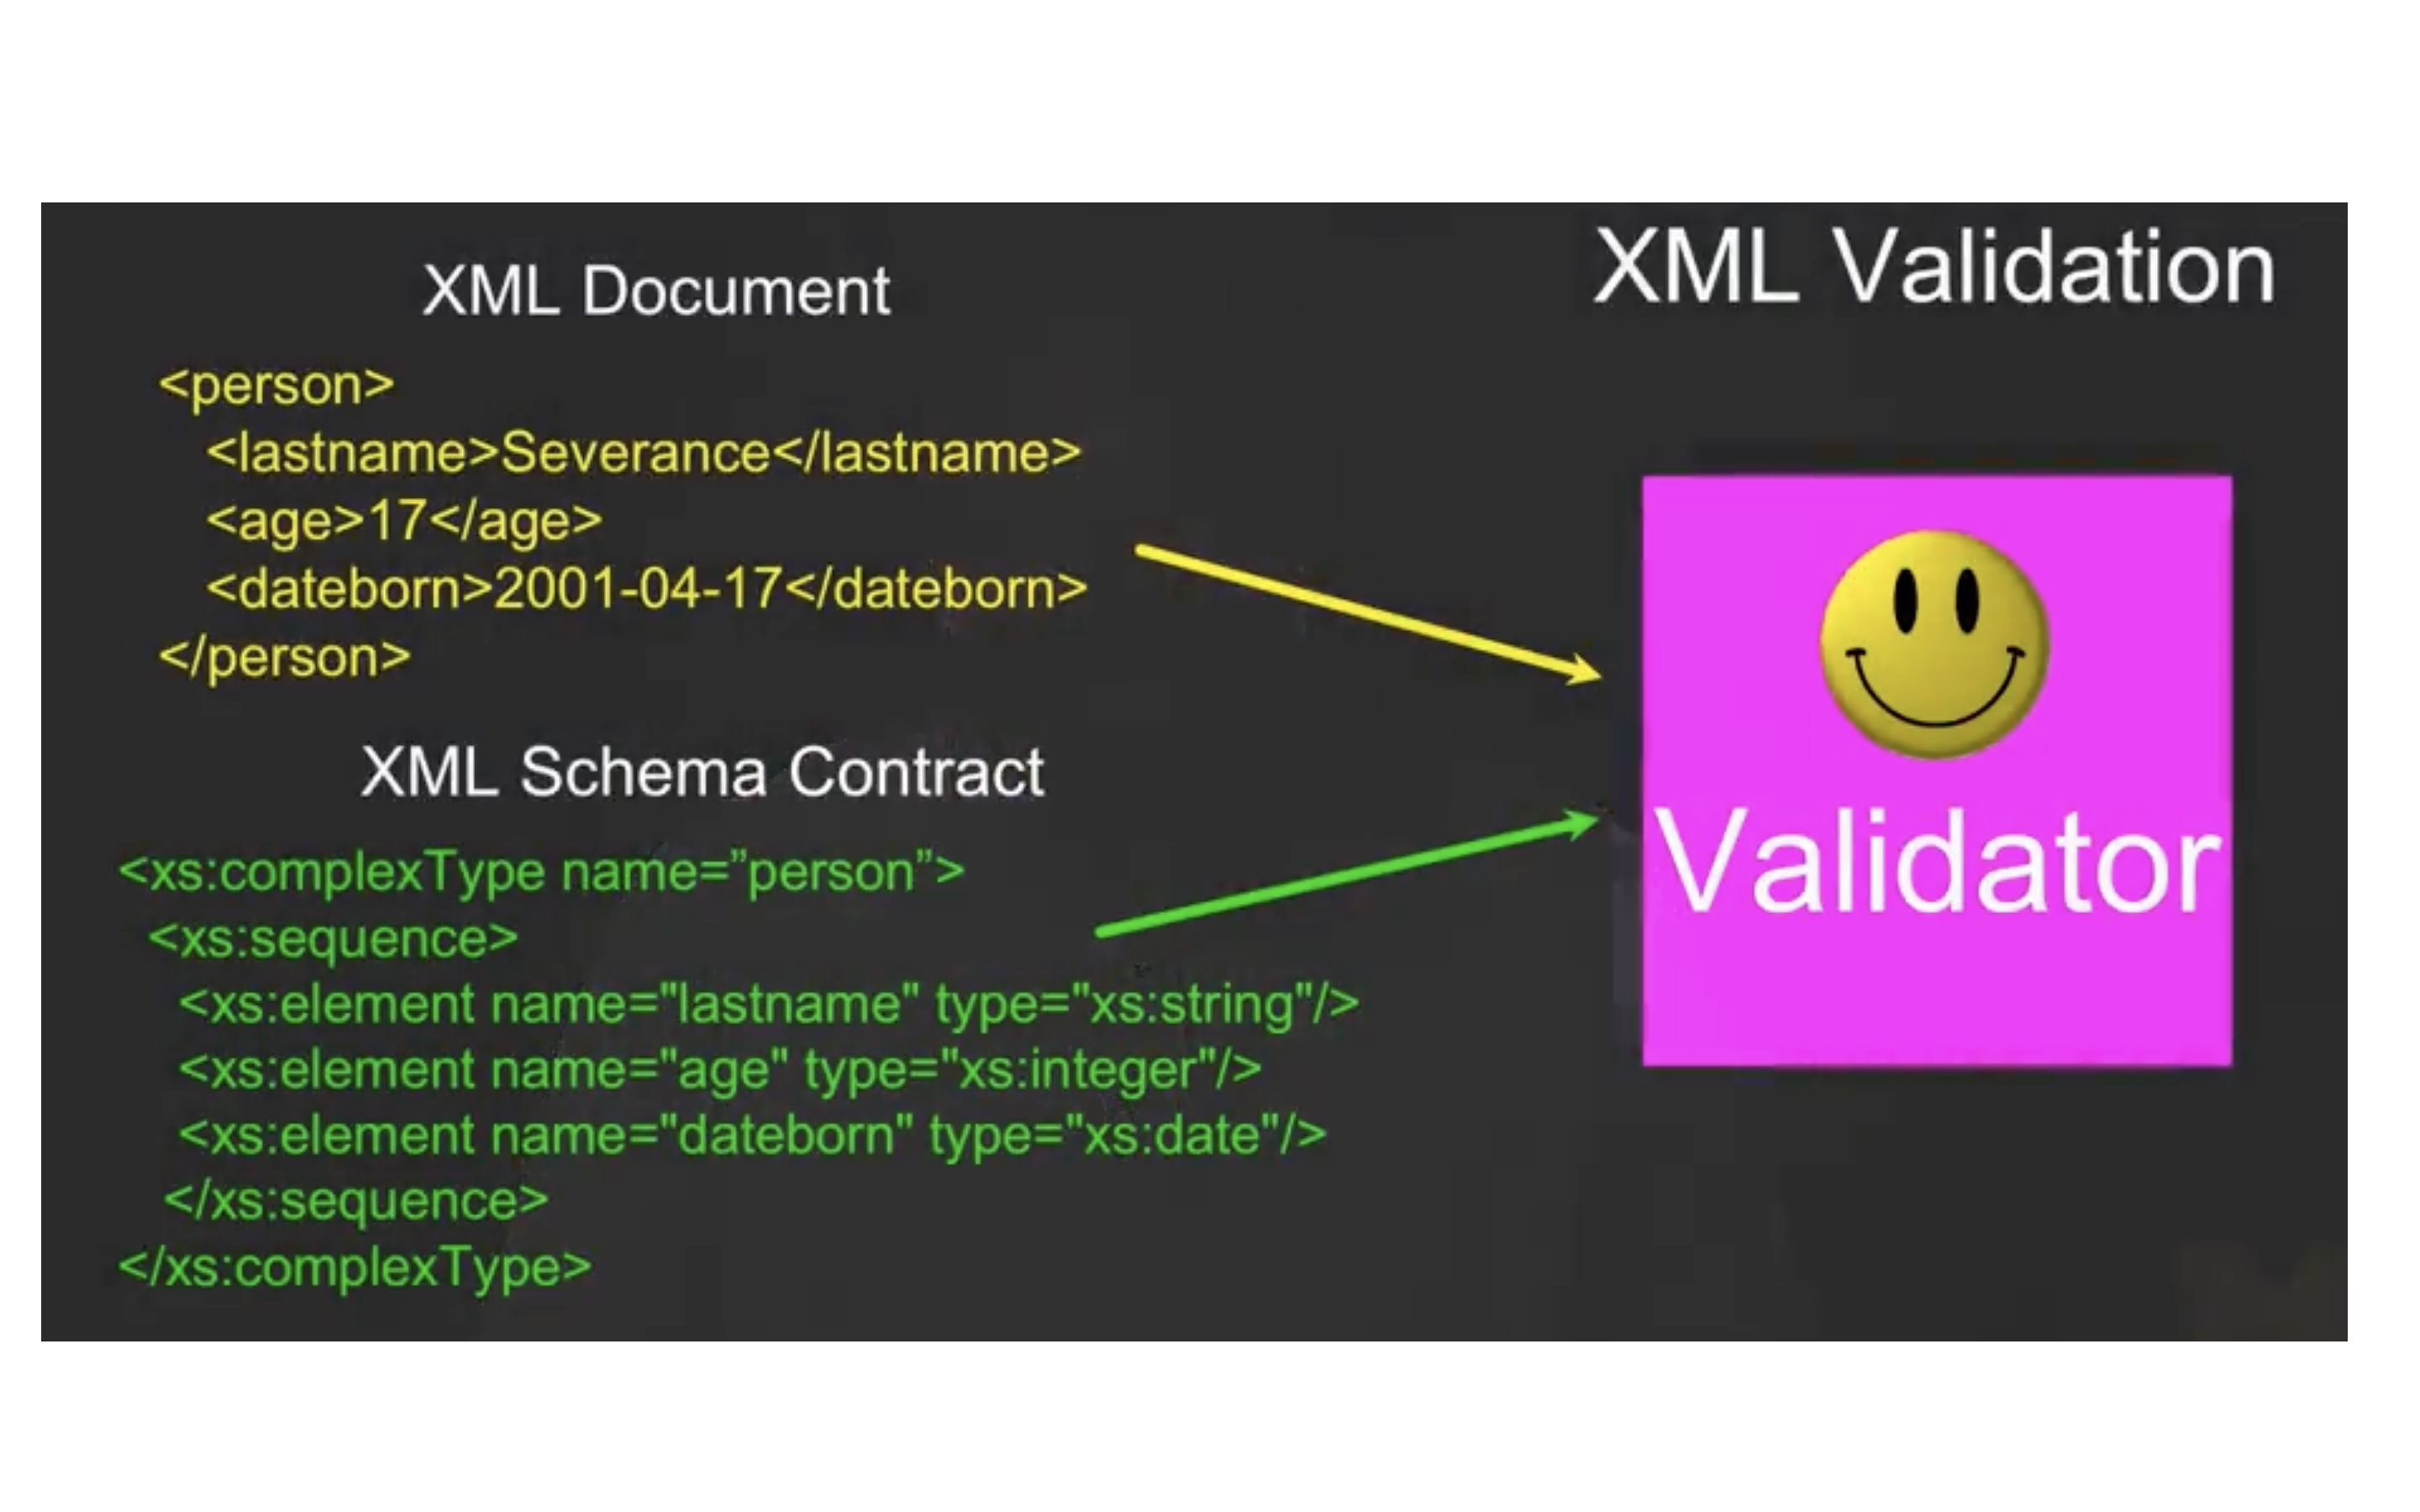

# punto extra en la clase

juan luis  + 1
martin cortes + 1
salvador rojas + 1

Aqyuí otro ejemplo de los archivos XSD

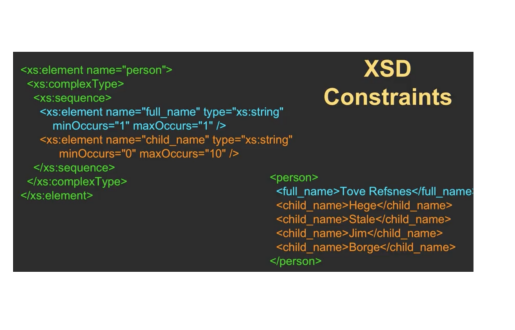

Estructura básica de un XSD

Un archivo XSD tiene una estructura jerárquica similar a un XML. Aquí te explico los componentes principales:

- Elemento raíz (<xs:schema>): Define el inicio del esquema.
- Elementos (<xs:element>): Define los elementos que pueden aparecer en el XML.
- Tipos de datos (<xs:complexType>, <xs:simpleType>): Especifica si un elemento contiene otros elementos (complexType) o solo texto (simpleType).
- Atributos (<xs:attribute>): Define los atributos que pueden tener los elementos.
- Restricciones (<xs:restriction>): Limita los valores que pueden tomar los elementos o atributos.

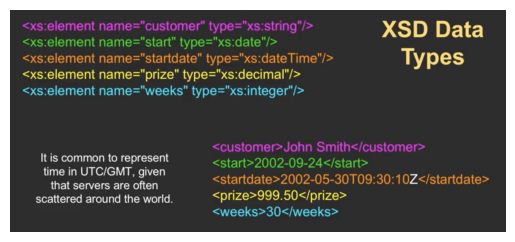

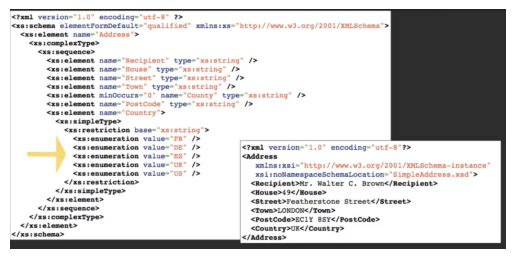

### Análisis de un XML

In [ ]:
import xml.etree.ElementTree as ET

data = '''
<person>
  <name>Chuck</name>
  <phone type="intl">
    +1 734 303 4456
  </phone>
  <email hide="yes" />
</person>'''

tree = ET.fromstring(data) # toma la cadena y devuelve el objeto en forma de arbol
print('Name:', tree.find('name').text) # dentro del arbol busca el valor de la etiqueta name el .text solo obtengo el valor
print('Attr:', tree.find('email').get('hide')) # encontramos el atributo hide usando get

Name: Chuck
Attr: yes


In [ ]:
import xml.etree.ElementTree as ET

data = '''
<stuff>
  <users>
    <user x="2">
      <id>001</id>
      <name>Chuck</name>
    </user>
    <user x="7">
      <id>009</id>
      <name>Brent</name>
    </user>
  </users>
</stuff>'''

stuff = ET.fromstring(data)
lst = stuff.findall('users/user')
print('User count:', len(lst))
for item in lst:
    print('Name', item.find('name').text)
    print('Id', item.find('id').text)
    print('Attribute', item.get("x"))



User count: 2
Name Chuck
Id 001
Attribute 2
Name Brent
Id 009
Attribute 7


#### Creación de un archivo XSD



Vamos a crear un archivo XSD para validar el XML de películas que creamos en la Clase 1.

Crear el archivo XSD

Abre un editor de texto (como Notepad++, VS Code, o cualquier otro).
Guarda el archivo con el nombre esquema.xsd.
Escribe el siguiente contenido:

La biblioteca más común para trabajar con XML y XSD en Python es lxml o xmlschema. Ambas son fáciles de usar y permiten validar XML contra XSD.

lxml: Una biblioteca rápida y potente para trabajar con XML y XSD.
xmlschema: Una biblioteca específica para validar XML contra XSD.

crear archivos XSD (XML Schema Definition) en Python, aunque no es tan común como crear o validar XML. Python no tiene una biblioteca nativa para generar XSD directamente, pero puedes usar bibliotecas de terceros como lxml o xmlschema para trabajar con esquemas XSD. Sin embargo, la creación de XSD generalmente se hace manualmente o con herramientas especializadas, ya que los esquemas XSD son documentos estáticos que definen la estructura de un XML.

Ejemplos de Código en Python

Validar un XML con un esquema XSD

Usaremos la biblioteca lxml para validar un XML contra un XSD.

In [ ]:
import xml.etree.ElementTree as ET

# Crear el elemento raíz
root = ET.Element("catalogo")

# Crear subelementos
libro1 = ET.SubElement(root, "libro", id="1")
ET.SubElement(libro1, "titulo").text = "Python para Principiantes"
ET.SubElement(libro1, "autor").text = "Juan Pérez"
ET.SubElement(libro1, "precio").text = "25.99"

libro2 = ET.SubElement(root, "libro", id="2")
ET.SubElement(libro2, "titulo").text = "Aprendiendo XML"
ET.SubElement(libro2, "autor").text = "María Gómez"
ET.SubElement(libro2, "precio").text = "19.50"

# Crear el árbol XML y guardar en archivo
tree = ET.ElementTree(root)
tree.write("catalogo_xsd.xml", encoding="utf-8", xml_declaration=True)

print("Archivo XML creado exitosamente!")

Archivo XML creado exitosamente!


In [ ]:
xsd_content = """<?xml version="1.0" encoding="UTF-8"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
  <xs:element name="catalogo">
    <xs:complexType>
      <xs:sequence>
        <xs:element name="libro" maxOccurs="unbounded">
          <xs:complexType>
            <xs:sequence>
              <xs:element name="titulo" type="xs:string"/>
              <xs:element name="autor" type="xs:string"/>
              <xs:element name="precio" type="xs:decimal"/>
            </xs:sequence>
            <xs:attribute name="id" type="xs:integer" use="required"/>
          </xs:complexType>
        </xs:element>
      </xs:sequence>
    </xs:complexType>
  </xs:element>
</xs:schema>"""

with open("catalogo.xsd", "w", encoding="utf-8") as f:
    f.write(xsd_content)

print("Archivo XSD creado exitosamente!")

Archivo XSD creado exitosamente!


In [ ]:
from lxml import etree


def validar(xsd_path, xml_path):
  ## Rutas de los archivos
  #xsd_path = '/content/catalogo.xsd'
  #xml_path = '/content/catalogo_xsd.xml'

  try:
      # 1. Parsear y cargar el esquema XSD
      xsd_doc = etree.parse(xsd_path)  # Parsea el archivo XSD a un árbol XML
      xsd = etree.XMLSchema(xsd_doc)   # Crea un objeto de validación XSD

      # 2. Parsear el archivo XML a validar
      xml_doc = etree.parse(xml_path)   # Carga el XML como árbol XML

      # 3. Validación (dos métodos)

      # Método 1: validate() - Retorna True/False
      is_valid = xsd.validate(xml_doc)
      print(f"Validación con validate(): {'Éxito' if is_valid else 'Falló'}")

      # Método 2: assertValid() - Lanza excepción si no es válido
      xsd.assertValid(xml_doc)
      print("Validación con assertValid(): Éxito")

      # Si llegamos aquí, el XML es válido
      print("El archivo XML es válido según el esquema XSD.")

  except etree.XMLSchemaParseError as e:
      print(f"Error al parsear el XSD: {e}")
  except etree.XMLSyntaxError as e:
      print(f"Error de sintaxis en el XML: {e}")
  except etree.DocumentInvalid as e:
      print(f"El XML no es válido: {e}")
  except Exception as e:
      print(f"Error inesperado: {e}")

In [ ]:
validar("/content/catalogo.xsd", "/content/catalogo_xsd.xml")

Validación con validate(): Éxito
Validación con assertValid(): Éxito
El archivo XML es válido según el esquema XSD.


In [ ]:
from lxml import etree

# Cargar el archivo XSD
xsd_path = '/content/schema_example.xsd'
with open(xsd_path, 'rb') as f:
    xsd_content = f.read()
schema = etree.XMLSchema(etree.fromstring(xsd_content))

# Cargar el archivo XML
xml_path = '/content/persona.xml'
with open(xml_path, 'rb') as f:
    xml_content = f.read()
xml_doc = etree.fromstring(xml_content)

# Validar
try:
    schema.assertValid(xml_doc)
    print("El XML es válido según el XSD.")
except etree.DocumentInvalid as e:
    print("El XML no es válido:", e)

El XML es válido según el XSD.


In [ ]:
data = '''<!-- esquema.xsd -->
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
  <!-- Define el elemento raíz "peliculas" -->
  <xs:element name="peliculas">
    <xs:complexType>
      <!-- Indica que puede contener múltiples elementos "pelicula" -->
      <xs:sequence>
        <xs:element name="pelicula" maxOccurs="unbounded">
          <xs:complexType>
            <!-- Define los elementos dentro de "pelicula" -->
            <xs:sequence>
              <xs:element name="titulo" type="xs:string"/>
              <xs:element name="director" type="xs:string"/>
              <xs:element name="año" type="xs:integer"/>
            </xs:sequence>
            <!-- Define el atributo "id" -->
            <xs:attribute name="id" type="xs:integer" use="required"/>
          </xs:complexType>
        </xs:element>
      </xs:sequence>
    </xs:complexType>
  </xs:element>
</xs:schema>
'''


Explicación del XSD:

- <xs:element name="peliculas">: Define el elemento raíz del XML.
- <xs:complexType>: Indica que el elemento peliculas contiene otros elementos.
- <xs:sequence>: Especifica que los elementos deben aparecer en el orden definido.
- <xs:element name="pelicula" maxOccurs="unbounded">: Define que puede haber múltiples elementos pelicula.
- <xs:element name="titulo" type="xs:string"/>: Define un elemento titulo de tipo texto.
- <xs:attribute name="id" type="xs:integer" use="required"/>: Define un atributo id de tipo entero que es obligatorio.

# Ejercicios 2

Ejercicio 0: Crear una función que reciba como parametros las rutas de los aarchivos xml y xsd, y que haga la validacion del archivo xml del xsd.


Ejercicio 1: Crear un XML de estudiantes

Crea un archivo XML que represente una lista de estudiantes con la siguiente estructura:

Elemento raíz: "universidad"
Cada estudiante debe tener: nombre, apellido, id (atributo), carrera y promedio
Incluye al menos 3 estudiantes

Ejercicio 2: Crear el XSD correspondiente

Define un esquema XSD que valide:

Que el promedio sea un número decimal entre 0.0 y 5.0
Que el id sea requerido
Que nombre y apellido sean strings no vacíos

Ejercicio 3: Validación con errores

Modifica el XML del ejercicio 1 para introducir errores (como un promedio mayor a 5.0 o un id faltante) y muestra los mensajes de error que produce la validación.



In [ ]:
# Crear XML de estudiantes
root = ET.Element("universidad")

estudiantes = [
    {"id": "101", "nombre": "Ana", "apellido": "García", "carrera": "Ingeniería", "promedio": "4.2"},
    {"id": "102", "nombre": "Luis", "apellido": "Martínez", "carrera": "Medicina", "promedio": "3"},
    {"id": "103", "nombre": "Carlos", "apellido": "Rodríguez", "carrera": "Derecho", "promedio": "3.9"}
]


In [ ]:


for est in estudiantes:
    estudiante = ET.SubElement(root, "estudiante", id=est["id"])
    ET.SubElement(estudiante, "nombre").text = est["nombre"]
    ET.SubElement(estudiante, "apellido").text = est["apellido"]
    ET.SubElement(estudiante, "carrera").text = est["carrera"]
    ET.SubElement(estudiante, "promedio").text = est["promedio"]

tree = ET.ElementTree(root)
tree.write("universidad.xml", encoding="utf-8", xml_declaration=True)

In [ ]:
xsd_estudiantes = """<?xml version="1.0" encoding="UTF-8"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">
  <xs:element name="universidad">
    <xs:complexType>
      <xs:sequence>
        <xs:element name="estudiante" maxOccurs="unbounded">
          <xs:complexType>
            <xs:sequence>
              <xs:element name="nombre" type="xs:string"/>
              <xs:element name="apellido" type="xs:string"/>
              <xs:element name="carrera" type="xs:string"/>
              <xs:element name="promedio">
                <xs:simpleType>
                  <xs:restriction base="xs:decimal">
                    <xs:minInclusive value="0.0"/>
                    <xs:maxInclusive value="5"/>
                  </xs:restriction>
                </xs:simpleType>
              </xs:element>
            </xs:sequence>
            <xs:attribute name="id" type="xs:integer" use="required"/>
          </xs:complexType>
        </xs:element>
      </xs:sequence>
    </xs:complexType>
  </xs:element>
</xs:schema>"""

with open("universidad.xsd", "w", encoding="utf-8") as f:
    f.write(xsd_estudiantes)

In [ ]:
validar("/content/universidad.xsd","/content/universidad.xml")

Validación con validate(): Éxito
Validación con assertValid(): Éxito
El archivo XML es válido según el esquema XSD.
